In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

In [2]:
df = pd.read_csv("heart.csv")


In [3]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [4]:
df.shape

(303, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().T

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trtbps    303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalachh  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exng      303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slp       303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
caa       303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thall     303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
output    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

In [8]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[302 rows x 14 columns]

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [12]:
df['thall'].unique()

array([1, 2, 3, 0], dtype=int64)

In [13]:
# Replace the value 0 with 2 in the 'thall' column
df['thall'] = df['thall'].replace(0, 2)

In [14]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[302 rows x 14 columns]

In [15]:
# Mapping for 'cp' column
cp_mapping = {0: 'typical angina',
              1: 'atypical angina',
              2: 'non-anginal pain',
              3: 'asymptomatic'}
df['cp'] = df['cp'].map(cp_mapping)

# Mapping for 'slp' column
slp_mapping = {0: 'unsloping',
               1: 'flat',
               2: 'downsloping'}
df['slp'] = df['slp'].map(slp_mapping)

# Mapping for 'thall' column
thall_mapping = {1: 'fixed defect',
                 2: 'normal',
                 3: 'reversible defect'}
df['thall'] = df['thall'].map(thall_mapping)

# Mapping for 'rest_ecg' column
rest_ecg_mapping = {0: 'normal',
                    1: 'ST-T wave abnormality',
                    2: 'left ventricular hypertrophy'}
df['restecg'] = df['restecg'].map(rest_ecg_mapping)

# Mapping for 'sex' column
sex_mapping = {1: 'male',
               0: 'female'}
df['sex'] = df['sex'].map(sex_mapping)


In [16]:
df

age     sex                cp  trtbps  chol  fbs                restecg  \
0     63    male      asymptomatic     145   233    1                 normal   
1     37    male  non-anginal pain     130   250    0  ST-T wave abnormality   
2     41  female   atypical angina     130   204    0                 normal   
3     56    male   atypical angina     120   236    0  ST-T wave abnormality   
4     57  female    typical angina     120   354    0  ST-T wave abnormality   
..   ...     ...               ...     ...   ...  ...                    ...   
298   57  female    typical angina     140   241    0  ST-T wave abnormality   
299   45    male      asymptomatic     110   264    0  ST-T wave abnormality   
300   68    male    typical angina     144   193    1  ST-T wave abnormality   
301   57    male    typical angina     130   131    0  ST-T wave abnormality   
302   57  female   atypical angina     130   236    0                 normal   

     thalachh  exng  oldpeak          slp  caa              thall  output  
0         150     0      2.3    unsloping    0       fixed defect       1  
1         187     0      3.5    unsloping    0             normal       1  
2         172     0      1.4  downsloping    0             normal       1  
3         178     0      0.8  downsloping    0             normal       1  
4         163     1      0.6  downsloping    0             normal       1  
..        ...   ...      ...          ...  ...                ...     ...  
298       123     1      0.2         flat    0  reversible defect       0  
299       132     0      1.2         flat    0  reversible defect       0  
300       141     0      3.4         flat    2  reversible defect       0  
301       115     1      1.2         flat    1  reversible defect       0  
302       174     0      0.0         flat    1             normal       0  

[302 rows x 14 columns]

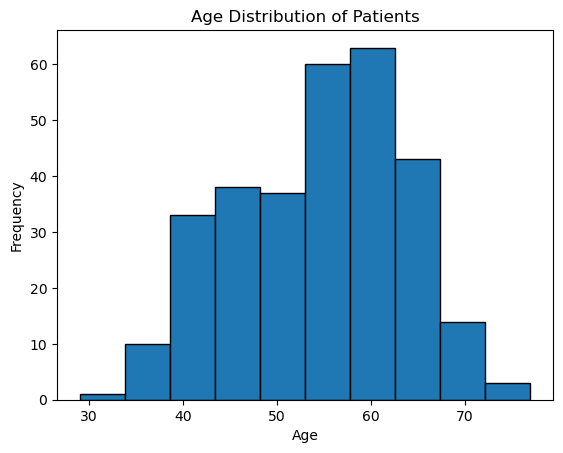

In [17]:
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

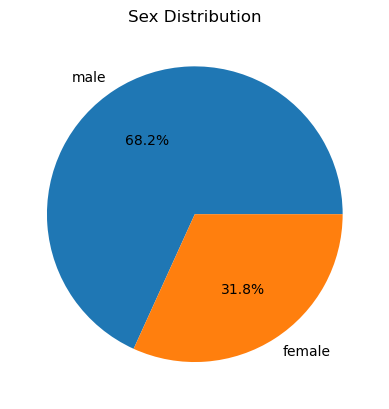

In [18]:
sex_count = df['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

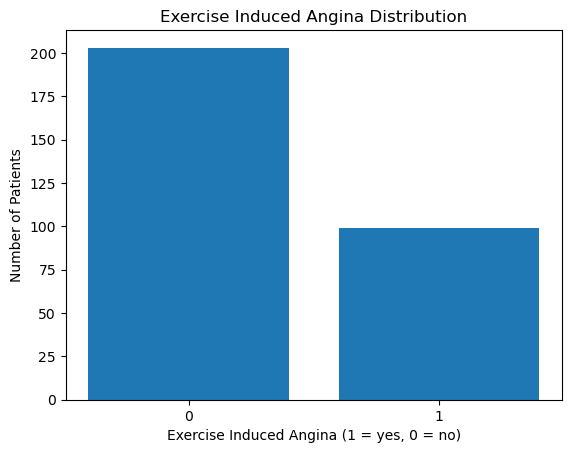

In [19]:
exang_count = df['exng'].value_counts()
plt.bar(exang_count.index, exang_count.values)
plt.title('Exercise Induced Angina Distribution')
plt.xlabel('Exercise Induced Angina (1 = yes, 0 = no)')
plt.ylabel('Number of Patients')
plt.xticks(exang_count.index)
plt.show()

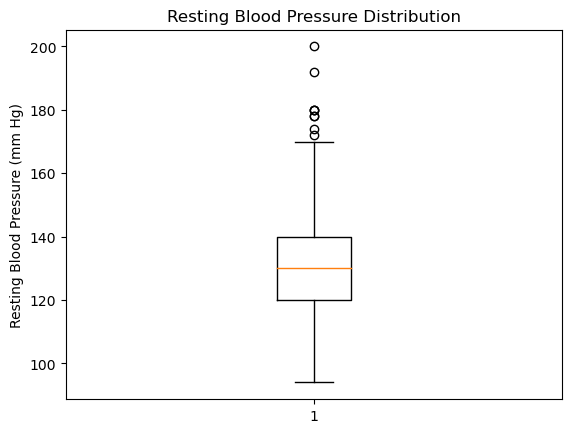

In [20]:
plt.boxplot(df['trtbps'])
plt.title('Resting Blood Pressure Distribution')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

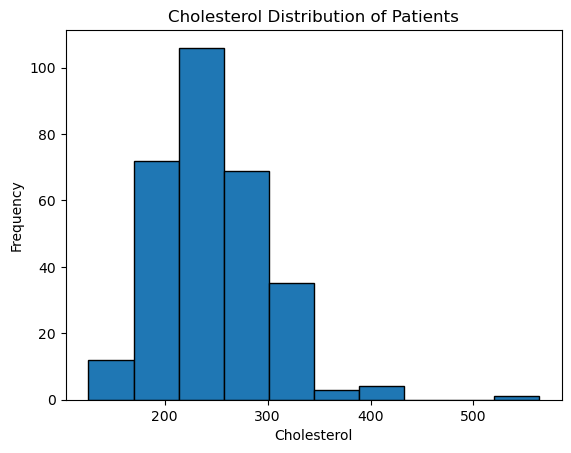

In [21]:
plt.hist(df['chol'], bins=10, edgecolor='black')
plt.title('Cholesterol Distribution of Patients')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

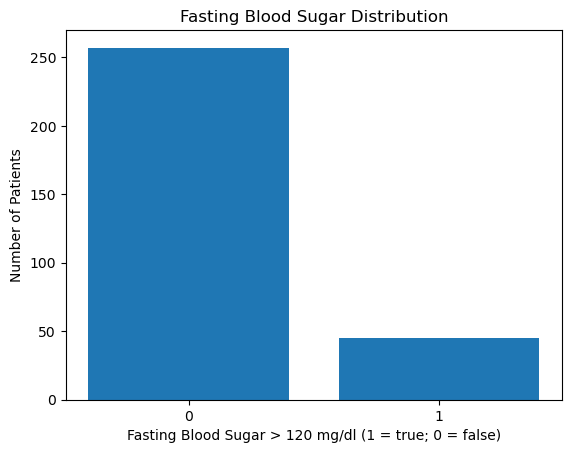

In [22]:
fbs_count = df['fbs'].value_counts()
plt.bar(fbs_count.index, fbs_count.values)
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(fbs_count.index)
plt.show()

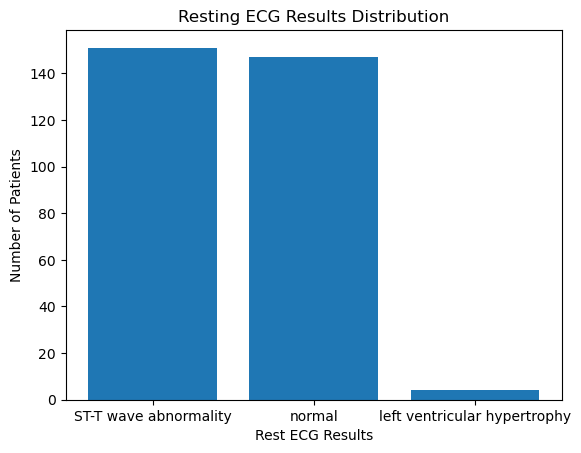

In [23]:
rest_ecg_count = df['restecg'].value_counts()
plt.bar(rest_ecg_count.index, rest_ecg_count.values)
plt.title('Resting ECG Results Distribution')
plt.xlabel('Rest ECG Results')
plt.ylabel('Number of Patients')
plt.xticks(rest_ecg_count.index)
plt.show()

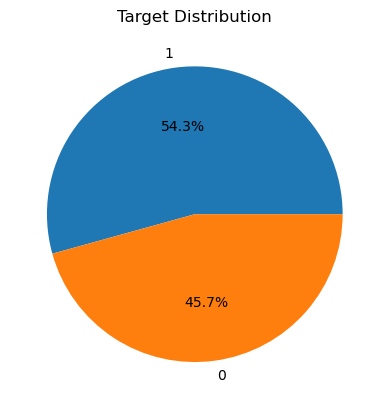

In [24]:
target_count = df['output'].value_counts()
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

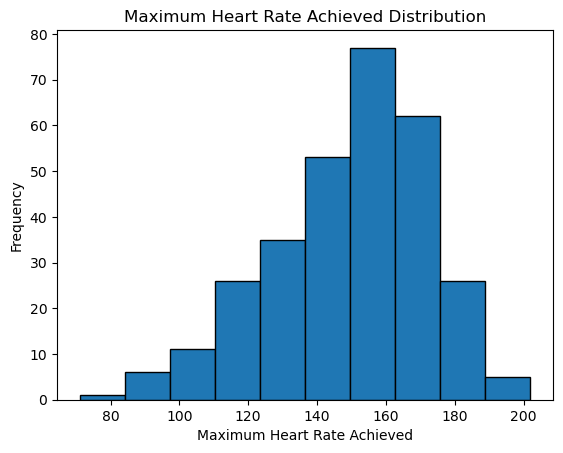

In [25]:
plt.hist(df['thalachh'], bins=10, edgecolor='black')
plt.title('Maximum Heart Rate Achieved Distribution')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.show()

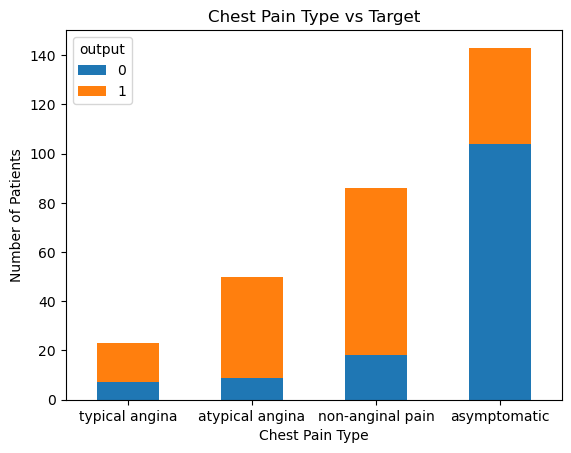

In [26]:
cp_target = df.groupby(['cp', 'output']).size().unstack().fillna(0)
cp_target.plot(kind='bar', stacked=True)
plt.title('Chest Pain Type vs Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'], rotation=0)
plt.show()

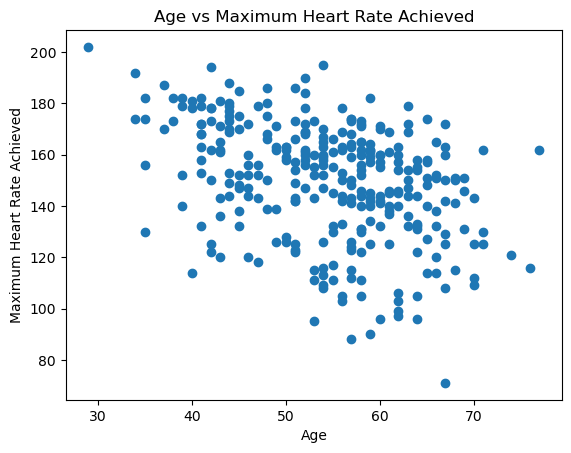

In [27]:
plt.scatter(df['age'], df['thalachh'])
plt.title('Age vs Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

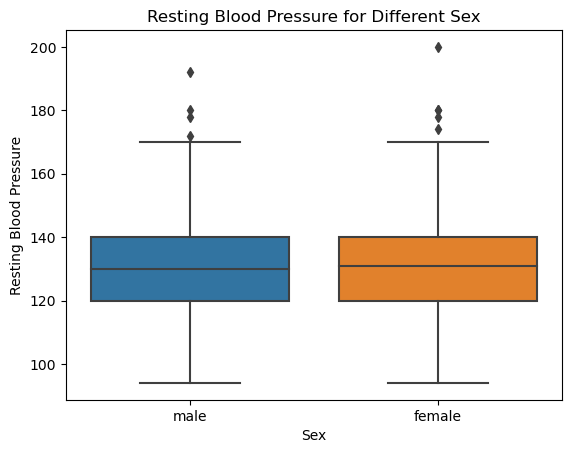

In [28]:
sns.boxplot(x='sex', y='trtbps', data=df)
plt.title('Resting Blood Pressure for Different Sex')
plt.xlabel('Sex')
plt.ylabel('Resting Blood Pressure')
plt.show()

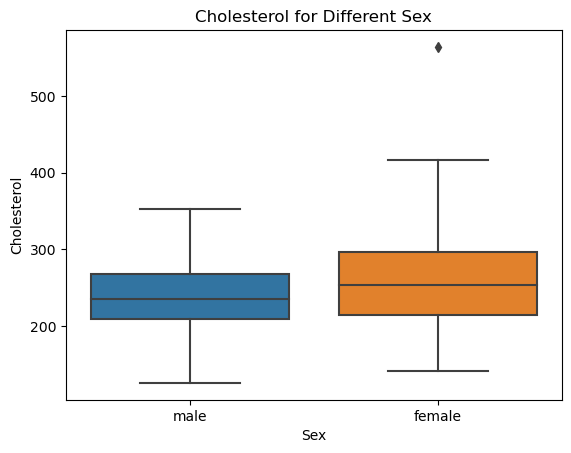

In [29]:
sns.boxplot(x='sex', y='chol', data=df)
plt.title('Cholesterol for Different Sex')
plt.xlabel('Sex')
plt.ylabel('Cholesterol')
plt.show()

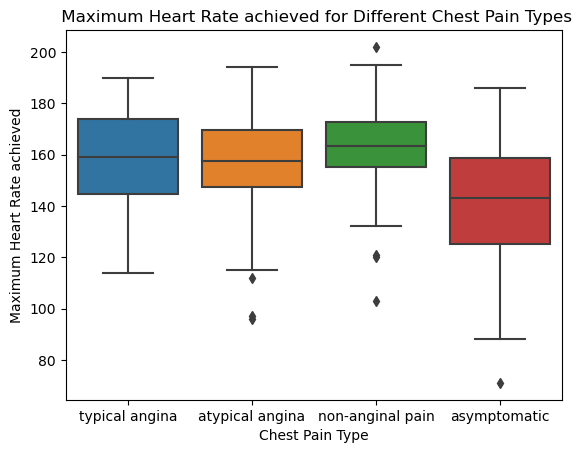

In [30]:
sns.boxplot(x='cp', y='thalachh', data=df)
plt.title(' Maximum Heart Rate achieved for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate achieved')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()

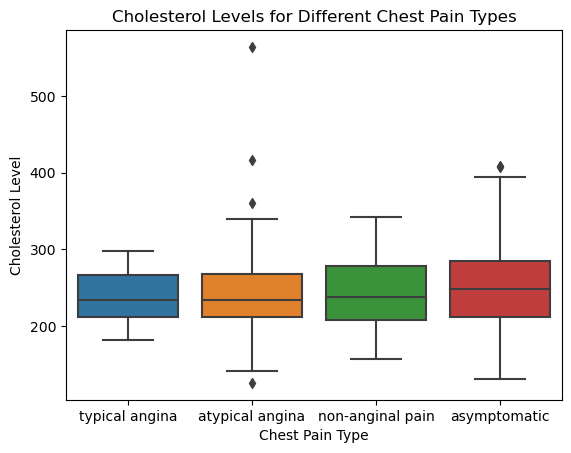

In [31]:
sns.boxplot(x='cp', y='chol', data=df)
plt.title('Cholesterol Levels for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol Level')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()

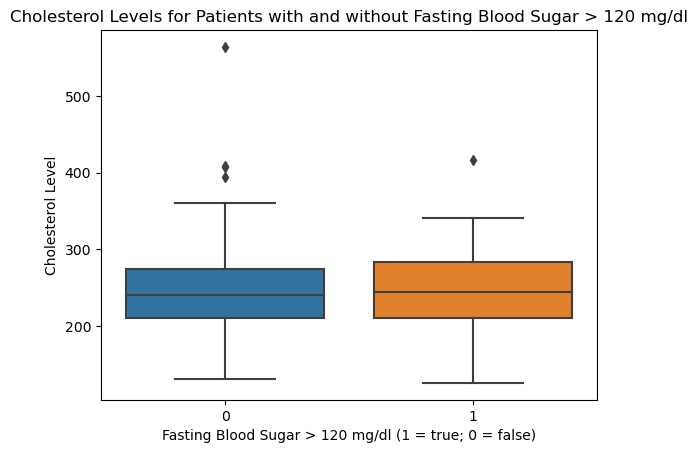

In [32]:
sns.boxplot(x='fbs', y='chol', data=df)
plt.title('Cholesterol Levels for Patients with and without Fasting Blood Sugar > 120 mg/dl')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Cholesterol Level')
plt.show()

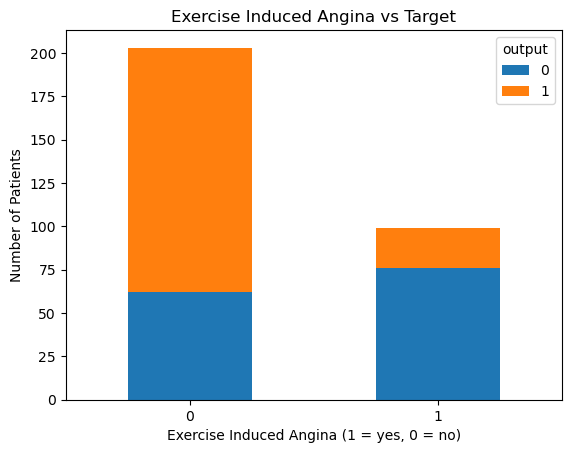

In [33]:
exang_target = df.groupby(['exng', 'output']).size().unstack().fillna(0)
exang_target.plot(kind='bar', stacked=True)
plt.title('Exercise Induced Angina vs Target')
plt.xlabel('Exercise Induced Angina (1 = yes, 0 = no)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

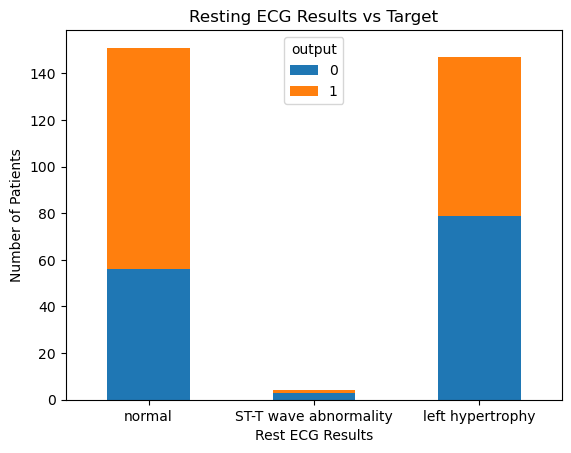

In [34]:
restecg_target = df.groupby(['restecg', 'output']).size().unstack().fillna(0)
restecg_target.plot(kind='bar', stacked=True)
plt.title('Resting ECG Results vs Target')
plt.xlabel('Rest ECG Results')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0,1,2], labels=['normal', 'ST-T wave abnormality', 'left hypertrophy'], rotation=0)
plt.show()

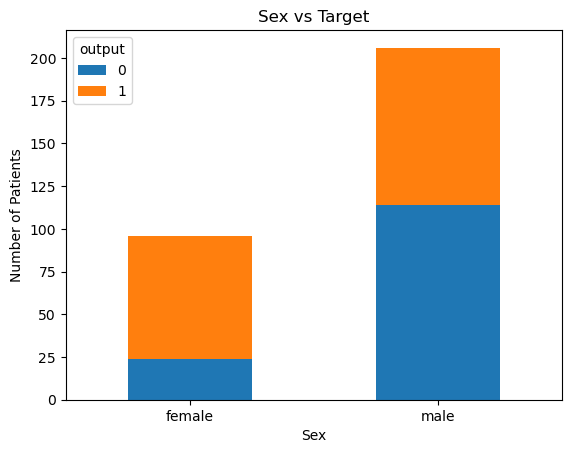

In [35]:
sex_target = df.groupby(['sex', 'output']).size().unstack().fillna(0)
sex_target.plot(kind='bar', stacked=True)
plt.title('Sex vs Target')
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

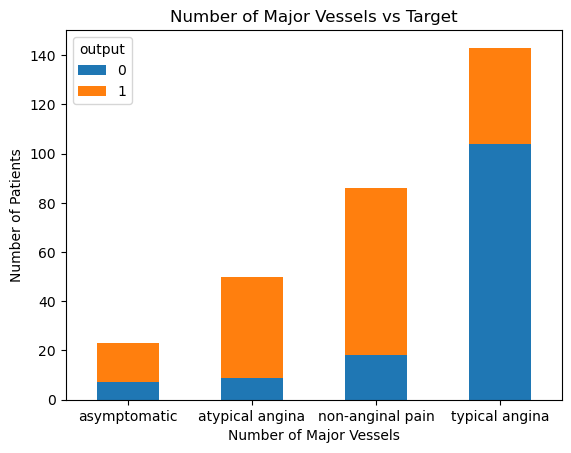

In [36]:
ca_target = df.groupby(['cp', 'output']).size().unstack().fillna(0)
ca_target.plot(kind='bar', stacked=True)
plt.title('Number of Major Vessels vs Target')
plt.xlabel('Number of Major Vessels')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

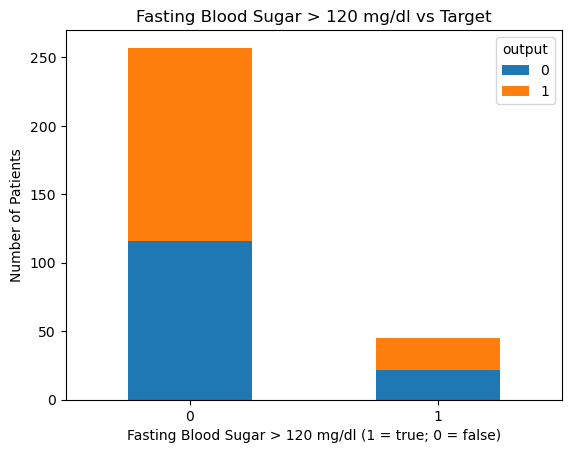

In [37]:
fbs_target = df.groupby(['fbs', 'output']).size().unstack().fillna(0)
fbs_target.plot(kind='bar', stacked=True)
plt.title('Fasting Blood Sugar > 120 mg/dl vs Target')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

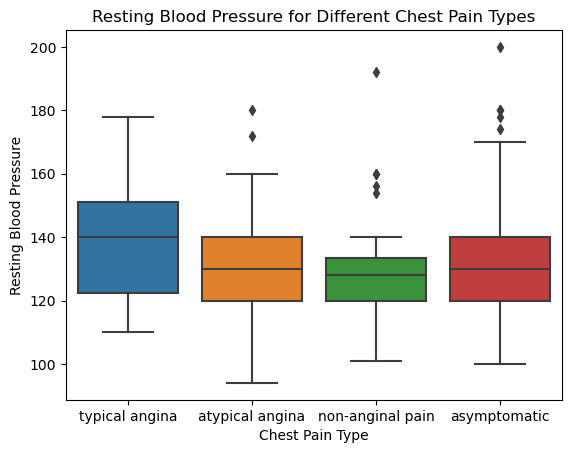

In [38]:
sns.boxplot(x='cp', y='trtbps', data=df)
plt.title('Resting Blood Pressure for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood Pressure')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()

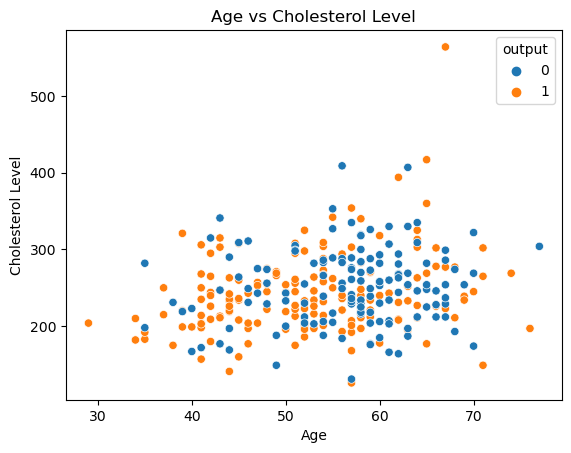

In [39]:
sns.scatterplot(x='age', y='chol', hue='output', data=df)
plt.title('Age vs Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()

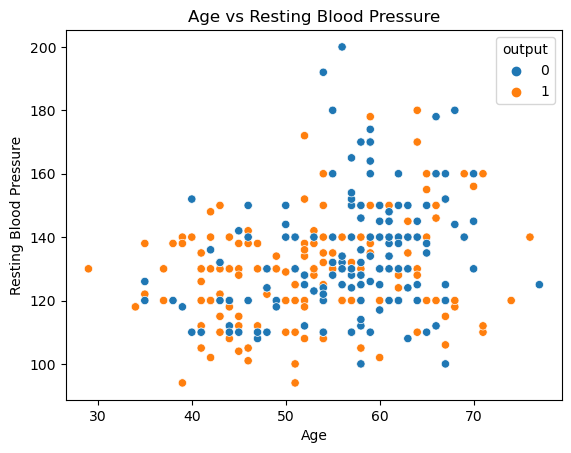

In [40]:
sns.scatterplot(x='age', y='trtbps', hue='output', data=df)
plt.title('Age vs Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

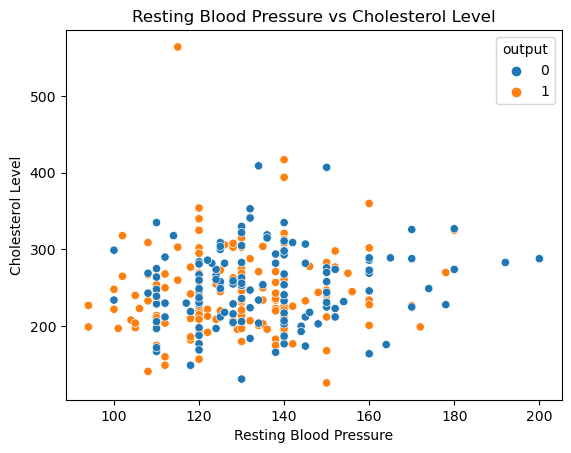

In [41]:
sns.scatterplot(x='trtbps', y='chol', hue='output', data=df)
plt.title('Resting Blood Pressure vs Cholesterol Level')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol Level')
plt.show()

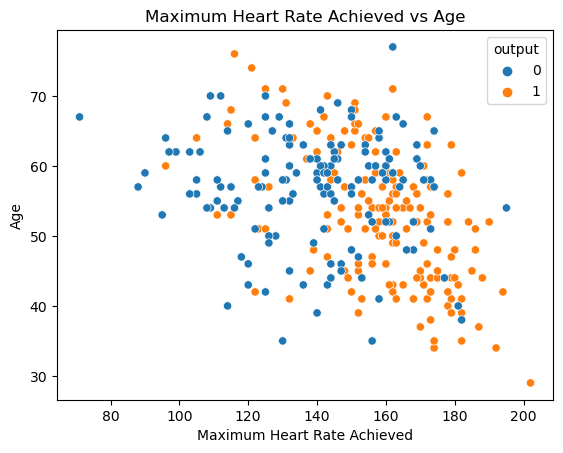

In [42]:
sns.scatterplot(x='thalachh', y='age', hue='output', data=df)
plt.title('Maximum Heart Rate Achieved vs Age')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Age')
plt.show()

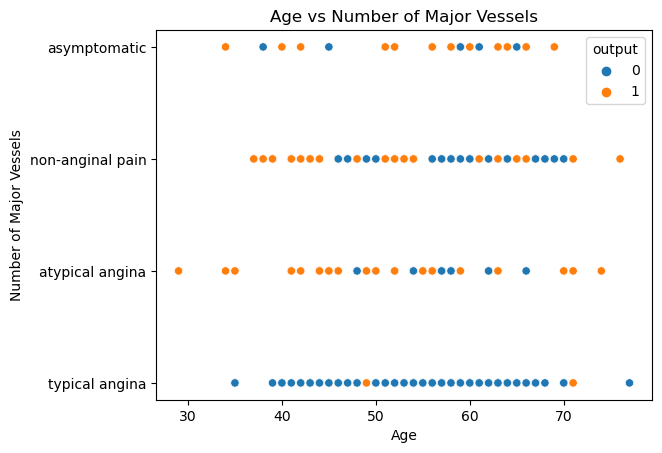

In [43]:
sns.scatterplot(x='age', y='cp', hue='output', data=df)
plt.title('Age vs Number of Major Vessels')
plt.xlabel('Age')
plt.ylabel('Number of Major Vessels')
plt.show()

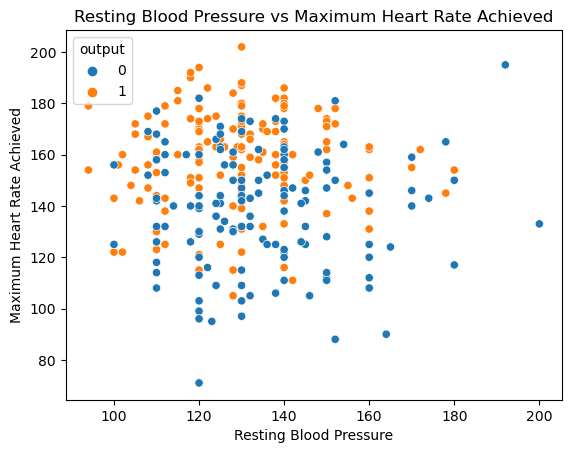

In [44]:
sns.scatterplot(x='trtbps', y='thalachh', hue='output', data=df)
plt.title('Resting Blood Pressure vs Maximum Heart Rate Achieved')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

In [45]:
data = df.copy()


In [46]:
data

age     sex                cp  trtbps  chol  fbs                restecg  \
0     63    male      asymptomatic     145   233    1                 normal   
1     37    male  non-anginal pain     130   250    0  ST-T wave abnormality   
2     41  female   atypical angina     130   204    0                 normal   
3     56    male   atypical angina     120   236    0  ST-T wave abnormality   
4     57  female    typical angina     120   354    0  ST-T wave abnormality   
..   ...     ...               ...     ...   ...  ...                    ...   
298   57  female    typical angina     140   241    0  ST-T wave abnormality   
299   45    male      asymptomatic     110   264    0  ST-T wave abnormality   
300   68    male    typical angina     144   193    1  ST-T wave abnormality   
301   57    male    typical angina     130   131    0  ST-T wave abnormality   
302   57  female   atypical angina     130   236    0                 normal   

     thalachh  exng  oldpeak          slp  caa              thall  output  
0         150     0      2.3    unsloping    0       fixed defect       1  
1         187     0      3.5    unsloping    0             normal       1  
2         172     0      1.4  downsloping    0             normal       1  
3         178     0      0.8  downsloping    0             normal       1  
4         163     1      0.6  downsloping    0             normal       1  
..        ...   ...      ...          ...  ...                ...     ...  
298       123     1      0.2         flat    0  reversible defect       0  
299       132     0      1.2         flat    0  reversible defect       0  
300       141     0      3.4         flat    2  reversible defect       0  
301       115     1      1.2         flat    1  reversible defect       0  
302       174     0      0.0         flat    1             normal       0  

[302 rows x 14 columns]

In [47]:
categorical_columns = ['sex','cp','restecg','slp','thall']
numerical_columns = ['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa','output']
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

In [48]:
dummy_variables

age  trtbps  chol  fbs  thalachh  exng  oldpeak  caa  output  sex_female  \
0     63     145   233    1       150     0      2.3    0       1       False   
1     37     130   250    0       187     0      3.5    0       1       False   
2     41     130   204    0       172     0      1.4    0       1        True   
3     56     120   236    0       178     0      0.8    0       1       False   
4     57     120   354    0       163     1      0.6    0       1        True   
..   ...     ...   ...  ...       ...   ...      ...  ...     ...         ...   
298   57     140   241    0       123     1      0.2    0       0        True   
299   45     110   264    0       132     0      1.2    0       0       False   
300   68     144   193    1       141     0      3.4    2       0       False   
301   57     130   131    0       115     1      1.2    1       0       False   
302   57     130   236    0       174     0      0.0    1       0        True   

     ...  cp_typical angina  restecg_ST-T wave abnormality  \
0    ...              False                          False   
1    ...              False                           True   
2    ...              False                          False   
3    ...              False                           True   
4    ...               True                           True   
..   ...                ...                            ...   
298  ...               True                           True   
299  ...              False                           True   
300  ...               True                           True   
301  ...               True                           True   
302  ...              False                          False   

     restecg_left ventricular hypertrophy  restecg_normal  slp_downsloping  \
0                                   False            True            False   
1                                   False           False            False   
2                                   False            True             True   
3                                   False           False             True   
4                                   False           False             True   
..                                    ...             ...              ...   
298                                 False           False            False   
299                                 False           False            False   
300                                 False           False            False   
301                                 False           False            False   
302                                 False            True            False   

     slp_flat  slp_unsloping  thall_fixed defect  thall_normal  \
0       False           True                True         False   
1       False           True               False          True   
2       False          False               False          True   
3       False          False               False          True   
4       False          False               False          True   
..        ...            ...                 ...           ...   
298      True          False               False         False   
299      True          False               False         False   
300      True          False               False         False   
301      True          False               False         False   
302      True          False               False          True   

     thall_reversible defect  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  
..                       ...  
298                     True  
299                     True  
300                     True  
301                     True  
302                    False  

[302 rows x 24 columns]

In [49]:
scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(data[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [50]:
scaled_numerical_df

age    trtbps      chol       fbs  thalachh      exng   oldpeak  \
0    0.949794  0.764066 -0.261285  2.389793  0.018826 -0.698344  1.084022   
1   -1.928548 -0.091401  0.067741 -0.418446  1.636979 -0.698344  2.118926   
2   -1.485726 -0.091401 -0.822564 -0.418446  0.980971 -0.698344  0.307844   
3    0.174856 -0.661712 -0.203222 -0.418446  1.243374 -0.698344 -0.209608   
4    0.285561 -0.661712  2.080602 -0.418446  0.587366  1.431958 -0.382092   
..        ...       ...       ...       ...       ...       ...       ...   
297  0.285561  0.478910 -0.106449 -0.418446 -1.161988  1.431958 -0.727060   
298 -1.042904 -1.232023  0.338703 -0.418446 -0.768384 -0.698344  0.135360   
299  1.503322  0.707035 -1.035462  2.389793 -0.374779 -0.698344  2.032684   
300  0.285561 -0.091401 -2.235438 -0.418446 -1.511859  1.431958  0.135360   
301  0.285561 -0.091401 -0.203222 -0.418446  1.068439 -0.698344 -0.899544   

          caa    output  
0   -0.714911  0.917313  
1   -0.714911  0.917313  
2   -0.714911  0.917313  
3   -0.714911  0.917313  
4   -0.714911  0.917313  
..        ...       ...  
297 -0.714911 -1.090140  
298 -0.714911 -1.090140  
299  1.274980 -1.090140  
300  0.280034 -1.090140  
301  0.280034 -1.090140  

[302 rows x 9 columns]

In [51]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

In [52]:
processed_df

sex_female sex_male cp_asymptomatic cp_atypical angina  \
0        False     True            True              False   
1        False     True           False              False   
2         True    False           False               True   
3        False     True           False               True   
4         True    False           False              False   
..         ...      ...             ...                ...   
299      False     True            True              False   
300      False     True           False              False   
301      False     True           False              False   
302       True    False           False               True   
164        NaN      NaN             NaN                NaN   

    cp_non-anginal pain cp_typical angina restecg_ST-T wave abnormality  \
0                 False             False                         False   
1                  True             False                          True   
2                 False             False                         False   
3                 False             False                          True   
4                 False              True                          True   
..                  ...               ...                           ...   
299               False             False                          True   
300               False              True                          True   
301               False              True                          True   
302               False             False                         False   
164                 NaN               NaN                           NaN   

    restecg_left ventricular hypertrophy restecg_normal slp_downsloping  ...  \
0                                  False           True           False  ...   
1                                  False          False           False  ...   
2                                  False           True            True  ...   
3                                  False          False            True  ...   
4                                  False          False            True  ...   
..                                   ...            ...             ...  ...   
299                                False          False           False  ...   
300                                False          False           False  ...   
301                                False          False           False  ...   
302                                False           True           False  ...   
164                                  NaN            NaN             NaN  ...   

    thall_reversible defect       age    trtbps      chol       fbs  thalachh  \
0                     False  0.949794  0.764066 -0.261285  2.389793  0.018826   
1                     False -1.928548 -0.091401  0.067741 -0.418446  1.636979   
2                     False -1.485726 -0.091401 -0.822564 -0.418446  0.980971   
3                     False  0.174856 -0.661712 -0.203222 -0.418446  1.243374   
4                     False  0.285561 -0.661712  2.080602 -0.418446  0.587366   
..                      ...       ...       ...       ...       ...       ...   
299                    True  1.503322  0.707035 -1.035462  2.389793 -0.374779   
300                    True  0.285561 -0.091401 -2.235438 -0.418446 -1.511859   
301                    True  0.285561 -0.091401 -0.203222 -0.418446  1.068439   
302                   False       NaN       NaN       NaN       NaN       NaN   
164                     NaN  1.392616  1.619532  0.764500 -0.418446 -1.817996   

         exng   oldpeak       caa    output  
0   -0.698344  1.084022 -0.714911  0.917313  
1   -0.698344  2.118926 -0.714911  0.917313  
2   -0.698344  0.307844 -0.714911  0.917313  
3   -0.698344 -0.209608 -0.714911  0.917313  
4    1.431958 -0.382092 -0.714911  0.917313  
..        ...       ...       ...       ...  
299 -0.698344  2.032684  1.274980 -1.090140  
300  1.431958  0.135360  0.280034 -1.090140  
301 -0.698

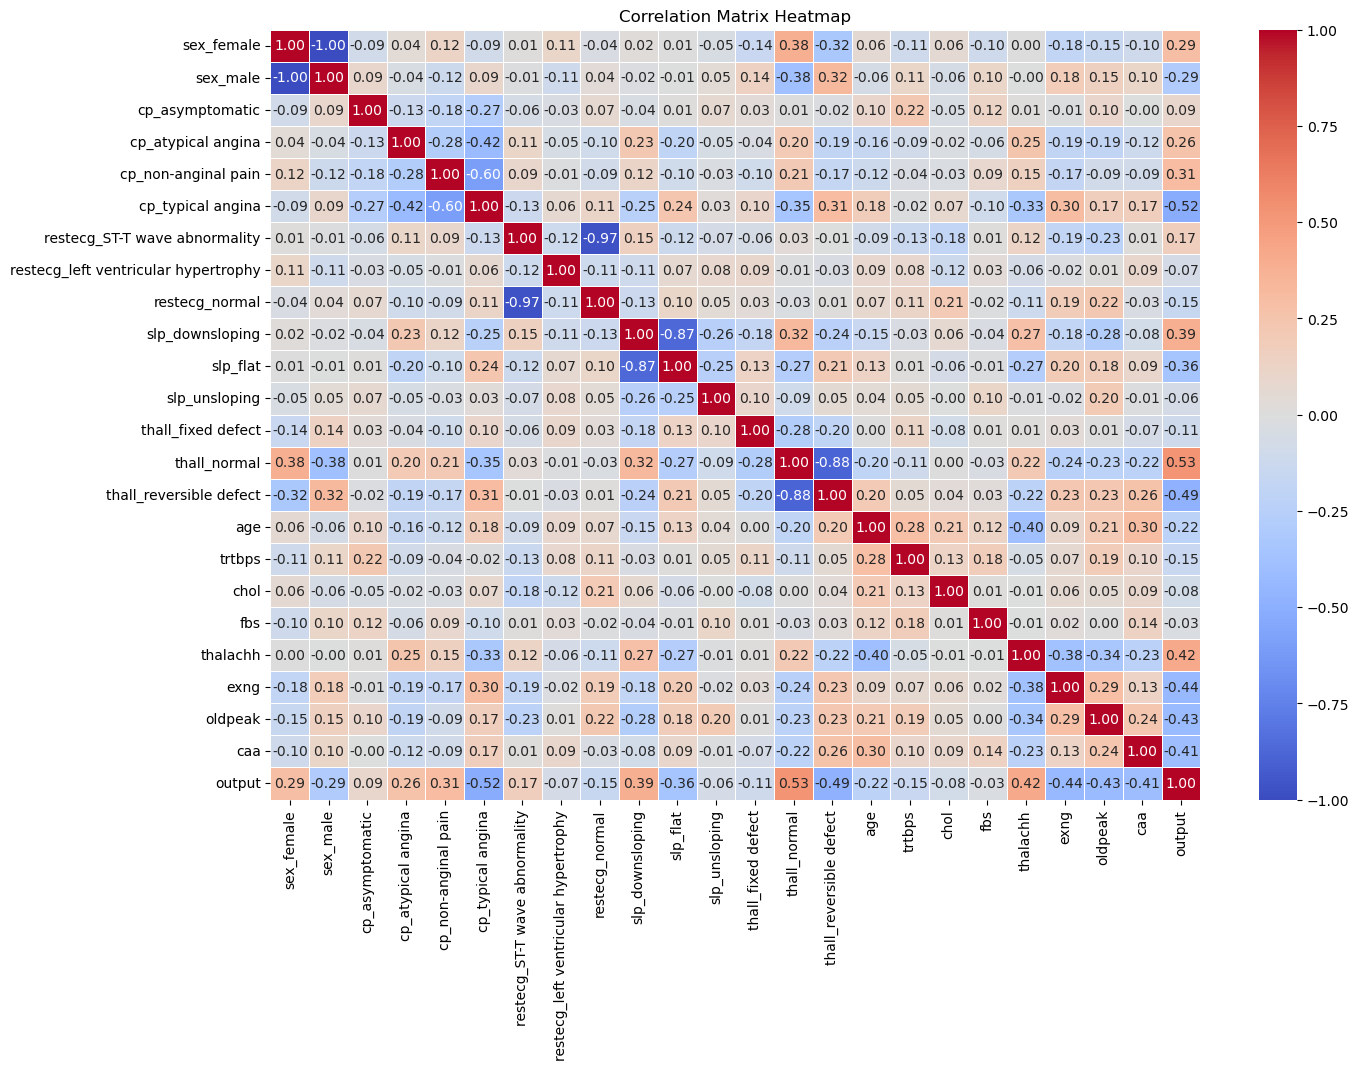

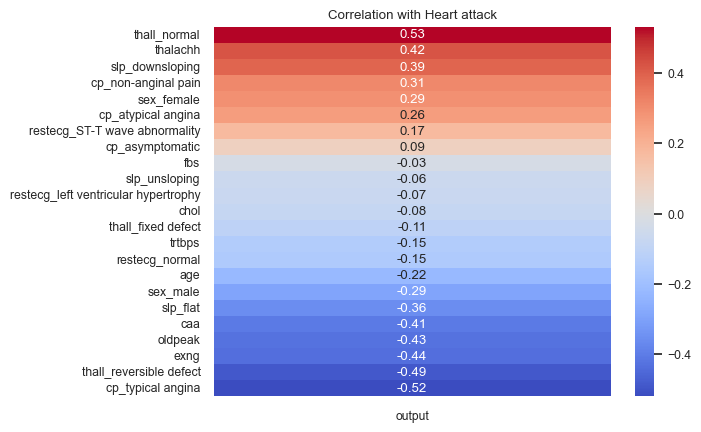

In [53]:
correlation_matrix = processed_df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = processed_df.corr()
target_corr = corr['output'].drop('output')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Heart attack')
plt.show()

In [54]:
df

age     sex                cp  trtbps  chol  fbs                restecg  \
0     63    male      asymptomatic     145   233    1                 normal   
1     37    male  non-anginal pain     130   250    0  ST-T wave abnormality   
2     41  female   atypical angina     130   204    0                 normal   
3     56    male   atypical angina     120   236    0  ST-T wave abnormality   
4     57  female    typical angina     120   354    0  ST-T wave abnormality   
..   ...     ...               ...     ...   ...  ...                    ...   
298   57  female    typical angina     140   241    0  ST-T wave abnormality   
299   45    male      asymptomatic     110   264    0  ST-T wave abnormality   
300   68    male    typical angina     144   193    1  ST-T wave abnormality   
301   57    male    typical angina     130   131    0  ST-T wave abnormality   
302   57  female   atypical angina     130   236    0                 normal   

     thalachh  exng  oldpeak          slp  caa              thall  output  
0         150     0      2.3    unsloping    0       fixed defect       1  
1         187     0      3.5    unsloping    0             normal       1  
2         172     0      1.4  downsloping    0             normal       1  
3         178     0      0.8  downsloping    0             normal       1  
4         163     1      0.6  downsloping    0             normal       1  
..        ...   ...      ...          ...  ...                ...     ...  
298       123     1      0.2         flat    0  reversible defect       0  
299       132     0      1.2         flat    0  reversible defect       0  
300       141     0      3.4         flat    2  reversible defect       0  
301       115     1      1.2         flat    1  reversible defect       0  
302       174     0      0.0         flat    1             normal       0  

[302 rows x 14 columns]

In [55]:
# First, handle the categorical columns
le = LabelEncoder()

for col in ['sex','cp','restecg','slp','thall']:
    df[col] = le.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()

for col in ['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa']:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

In [56]:
df

age  sex  cp    trtbps      chol       fbs  restecg  thalachh  \
0    0.949794    1   0  0.764066 -0.261285  2.389793        2  0.018826   
1   -1.928548    1   2 -0.091401  0.067741 -0.418446        0  1.636979   
2   -1.485726    0   1 -0.091401 -0.822564 -0.418446        2  0.980971   
3    0.174856    1   1 -0.661712 -0.203222 -0.418446        0  1.243374   
4    0.285561    0   3 -0.661712  2.080602 -0.418446        0  0.587366   
..        ...  ...  ..       ...       ...       ...      ...       ...   
298  0.285561    0   3  0.478910 -0.106449 -0.418446        0 -1.161988   
299 -1.042904    1   0 -1.232023  0.338703 -0.418446        0 -0.768384   
300  1.503322    1   3  0.707035 -1.035462  2.389793        0 -0.374779   
301  0.285561    1   3 -0.091401 -2.235438 -0.418446        0 -1.511859   
302  0.285561    0   1 -0.091401 -0.203222 -0.418446        2  1.068439   

         exng   oldpeak  slp       caa  thall  output  
0   -0.698344  1.084022    2 -0.714911      0       1  
1   -0.698344  2.118926    2 -0.714911      1       1  
2   -0.698344  0.307844    0 -0.714911      1       1  
3   -0.698344 -0.209608    0 -0.714911      1       1  
4    1.431958 -0.382092    0 -0.714911      1       1  
..        ...       ...  ...       ...    ...     ...  
298  1.431958 -0.727060    1 -0.714911      2       0  
299 -0.698344  0.135360    1 -0.714911      2       0  
300 -0.698344  2.032684    1  1.274980      2       0  
301  1.431958  0.135360    1  0.280034      2       0  
302 -0.698344 -0.899544    1  0.280034      1       0  

[302 rows x 14 columns]

In [57]:
# Compute t-SNE
X = df.drop('output', axis=1).values  # dropping the target column
y = df['output'].values  # the target column

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a new DataFrame for the two-dimensional t-SNE representation
df_tsne = pd.DataFrame(data = X_tsne, columns = ['Component 1', 'Component 2'])
df_tsne['Target'] = y

# Visualize with Plotly
fig = px.scatter(df_tsne, x='Component 1', y='Component 2', color='Target', 
                 title='2 Component t-SNE', template='plotly')
fig.show()


In [58]:
categorical_columns = ['sex','cp','restecg','slp','thall']
numerical_columns = ['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa']

In [59]:
# Split data
X = data.drop('output', axis=1)
y = data['output']

In [60]:
X

age     sex                cp  trtbps  chol  fbs                restecg  \
0     63    male      asymptomatic     145   233    1                 normal   
1     37    male  non-anginal pain     130   250    0  ST-T wave abnormality   
2     41  female   atypical angina     130   204    0                 normal   
3     56    male   atypical angina     120   236    0  ST-T wave abnormality   
4     57  female    typical angina     120   354    0  ST-T wave abnormality   
..   ...     ...               ...     ...   ...  ...                    ...   
298   57  female    typical angina     140   241    0  ST-T wave abnormality   
299   45    male      asymptomatic     110   264    0  ST-T wave abnormality   
300   68    male    typical angina     144   193    1  ST-T wave abnormality   
301   57    male    typical angina     130   131    0  ST-T wave abnormality   
302   57  female   atypical angina     130   236    0                 normal   

     thalachh  exng  oldpeak          slp  caa              thall  
0         150     0      2.3    unsloping    0       fixed defect  
1         187     0      3.5    unsloping    0             normal  
2         172     0      1.4  downsloping    0             normal  
3         178     0      0.8  downsloping    0             normal  
4         163     1      0.6  downsloping    0             normal  
..        ...   ...      ...          ...  ...                ...  
298       123     1      0.2         flat    0  reversible defect  
299       132     0      1.2         flat    0  reversible defect  
300       141     0      3.4         flat    2  reversible defect  
301       115     1      1.2         flat    1  reversible defect  
302       174     0      0.0         flat    1             normal  

[302 rows x 13 columns]

In [61]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 302, dtype: int64

In [62]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [63]:
X_train.shape

(241, 13)

In [64]:
X_test.shape

(61, 13)

In [65]:
y_train.shape

(241,)

In [66]:
y_test.shape

(61,)

In [67]:
# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# fit and transform training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [68]:
X_train

array([[-1.350641  , -0.63071093,  0.92713761, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.48742624,  2.75336332,  0.5269804 , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.37826981, -0.34870475,  0.1458783 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.59658267,  1.62533857, -0.23522381, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.72333121,  0.15890639, -0.23522381, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.94164408,  0.49731382, -0.97837292, ...,  0.        ,
         1.        ,  0.        ]])

In [69]:
X_test

array([[ 0.06839262,  0.04610392,  2.03233372, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.05080051, -0.34870475,  1.19390909, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.28670548,  1.06132619, -2.29317518, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.48742624,  0.72291877, -1.01648313, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.61417478,  0.49731382, -1.16892397, ...,  0.        ,
         1.        ,  0.        ],
       [-1.13232814, -1.08192084,  0.83186209, ...,  0.        ,
         1.        ,  0.        ]])

In [70]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    return train_acc, test_acc, test_preds

In [71]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [72]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')
]

In [73]:
model_names = ["Logistic Regression", "SVC", "Decision Trees", "Random Forest", "Gradient Boosting", "KNN", "Naive Bayes", "XGBoost"]

train_results = []
test_results = []

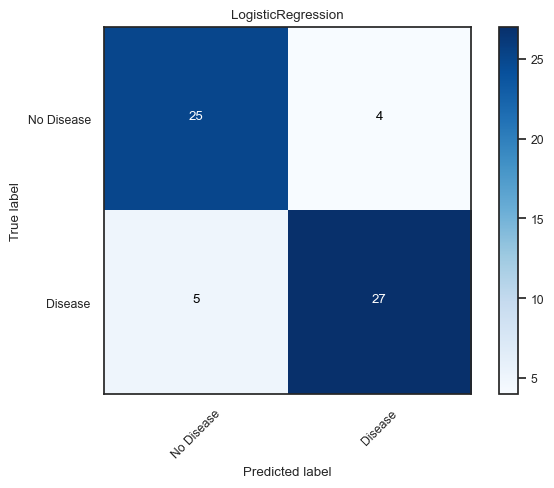

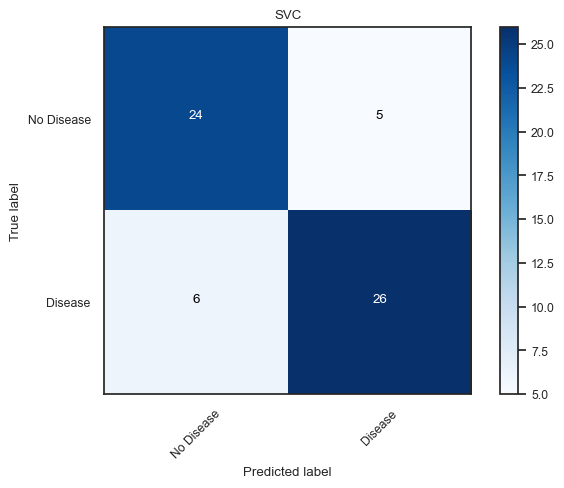

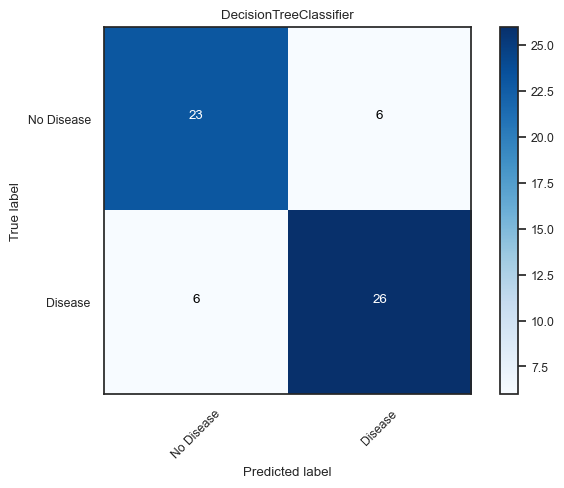

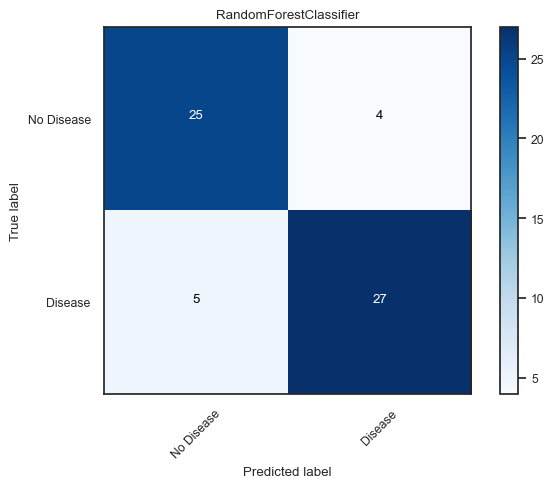

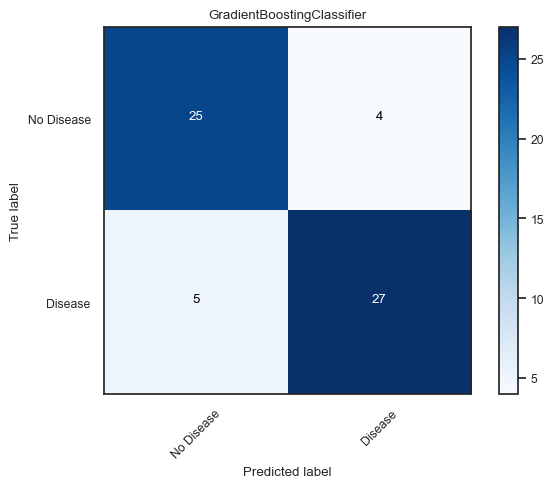

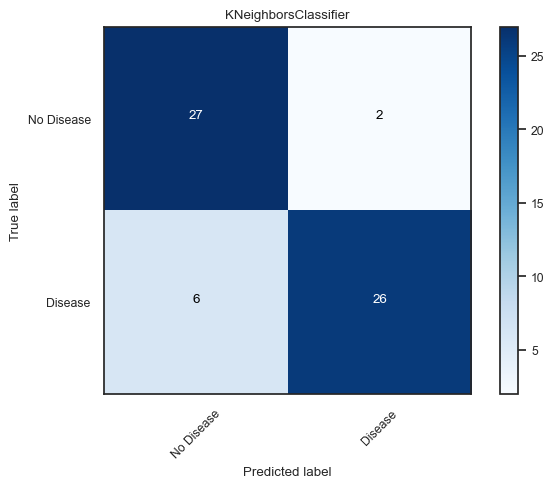

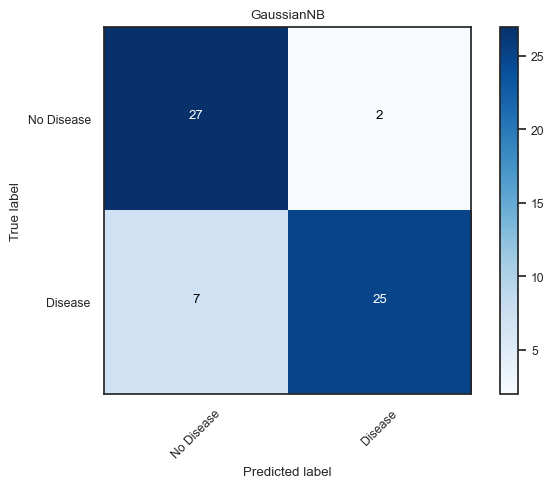

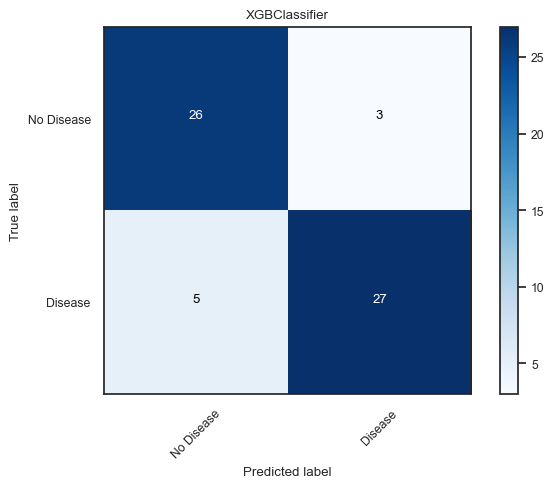

In [74]:
for model in models:
    train_acc, test_acc, y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)
    train_results.append(train_acc)
    test_results.append(test_acc)
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=['No Disease', 'Disease'], title=model.__class__.__name__)
    plt.show()

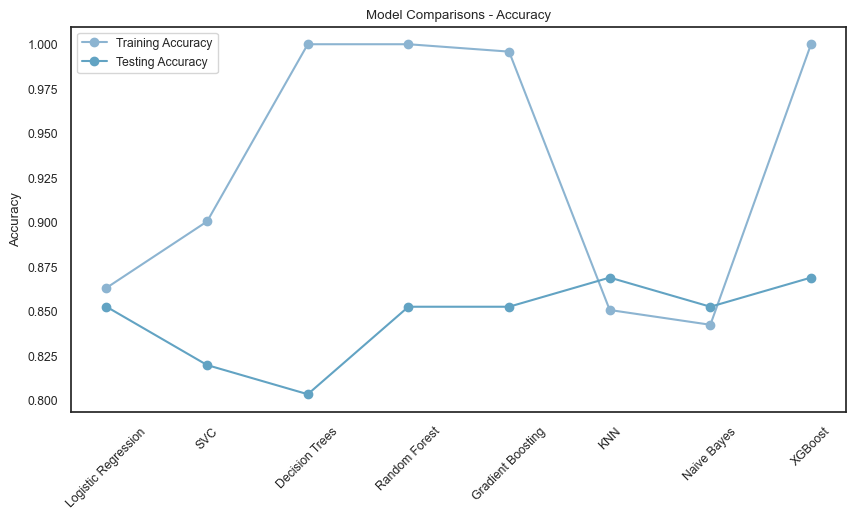

In [75]:
# plot model performance
plt.figure(figsize=(10,5))
plt.plot(model_names, train_results, 'o-', label="Training Accuracy")
plt.plot(model_names, test_results, 'o-', label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend()
plt.title("Model Comparisons - Accuracy")
plt.show()